Z

# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key
# city_url = f"{url}?q={city}&appid={weather_api_key}********

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger       `   `
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url +"&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1 

    # Run an AP eI request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | afaahiti
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | greymouth
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | sishilichengzi
City not found. Skipping...
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | sena madureira
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | kosh-agach
Processing Record 13 of Set 1 | wajir
Processing Record 14 of Set 1 | jaisalmer
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | arno
Processing Record 17 of Set 1 | pangody
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | ta`u
Processing Record 20 of Set 1 | achinsk
Processing Record 21 of Set 1 | waddan
Processing Record 22 of Set 1 | pisco
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,11.88,89,100,3.34,NZ,1740955927
1,afaahiti,-17.7500,-149.2833,26.80,74,9,5.06,PF,1740955928
2,waitangi,-43.9535,-176.5597,17.68,94,93,2.68,NZ,1740955929
3,grytviken,-54.2811,-36.5092,3.42,80,23,4.52,GS,1740955930
4,greymouth,-42.4667,171.2000,19.83,79,93,2.50,NZ,1740955931


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,11.88,89,100,3.34,NZ,1740955927
1,afaahiti,-17.7500,-149.2833,26.80,74,9,5.06,PF,1740955928
2,waitangi,-43.9535,-176.5597,17.68,94,93,2.68,NZ,1740955929
3,grytviken,-54.2811,-36.5092,3.42,80,23,4.52,GS,1740955930
4,greymouth,-42.4667,171.2000,19.83,79,93,2.50,NZ,1740955931


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

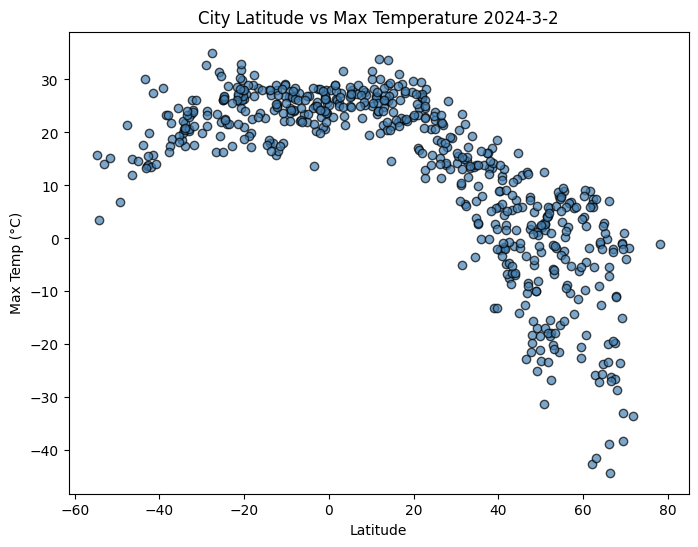

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"],city_data_df['Max Temp'], c="steelblue",edgecolors="black", alpha=0.7)
# plt.scatter(df["Lat"], df["Max Temp"], c="blue", edgecolors="black", alpha=0.7)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°C)")
plt.title("City Latitude vs Max Temperature 2024-3-2")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

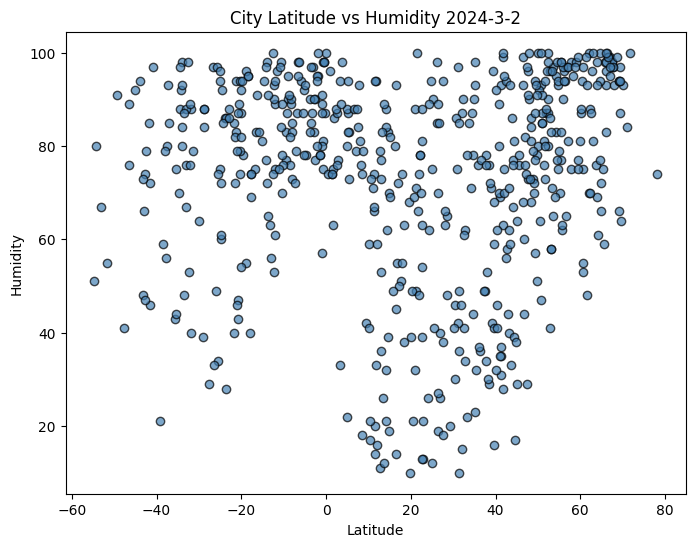

In [125]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"],city_data_df['Humidity'], c="steelblue",edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity 2024-3-2")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

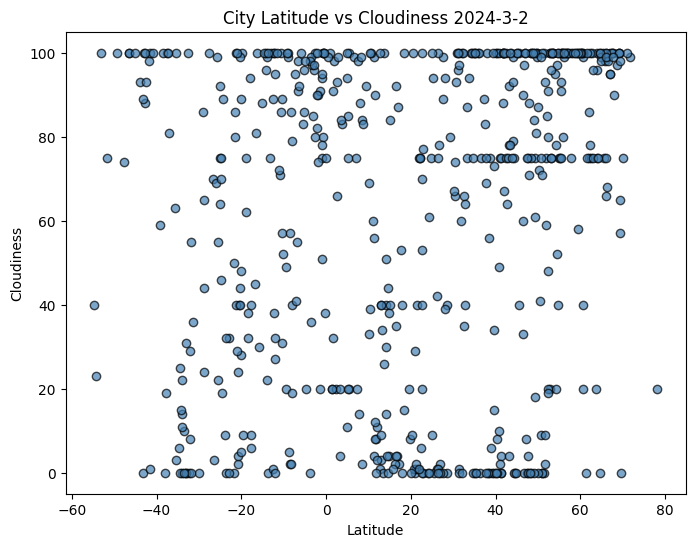

In [126]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"],city_data_df['Cloudiness'], c="steelblue",edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness 2024-3-2")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

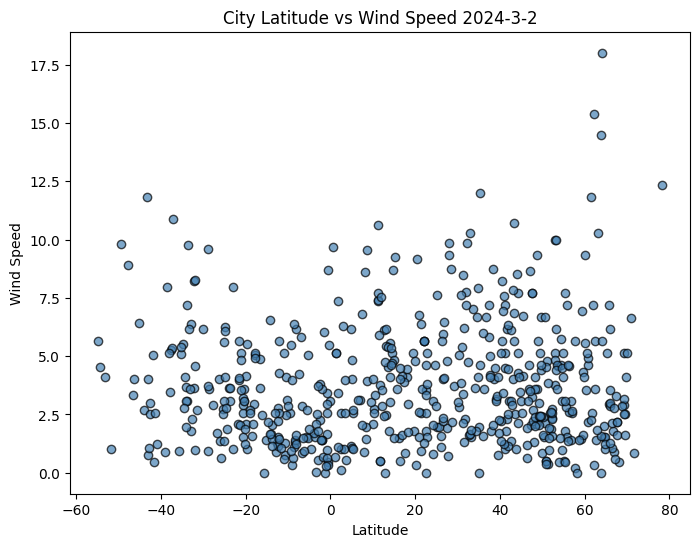

In [127]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"],city_data_df['Wind Speed'], c="steelblue",edgecolor="black", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed 2024-3-2")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [116]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):

     #generate linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " +str(round(slope,2)) +"x + " +str(round(intercept,2))
    text_coordinates = (0,0)
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq,text_coordinates, fontsize = 15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs {title}")
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()
   

In [91]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"]>=0) & (city_data_df["Lat"]<90)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,bethel,41.3712,-73.4140,-1.66,37,4,1.79,US,1740955934
10,kosh-agach,50.0000,88.6667,-23.23,100,87,0.83,RU,1740955939
11,wajir,1.7471,40.0573,26.39,63,32,7.35,KE,1740955940
12,jaisalmer,26.9147,70.9181,21.44,40,2,6.48,IN,1740955941
14,arno,60.1167,18.6333,3.97,87,100,5.58,SE,1740955943


In [92]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"]<0) & (city_data_df["Lat"]>= -90)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,11.88,89,100,3.34,NZ,1740955927
1,afaahiti,-17.7500,-149.2833,26.80,74,9,5.06,PF,1740955928
2,waitangi,-43.9535,-176.5597,17.68,94,93,2.68,NZ,1740955929
3,grytviken,-54.2811,-36.5092,3.42,80,23,4.52,GS,1740955930
4,greymouth,-42.4667,171.2000,19.83,79,93,2.50,NZ,1740955931


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6735785101045733


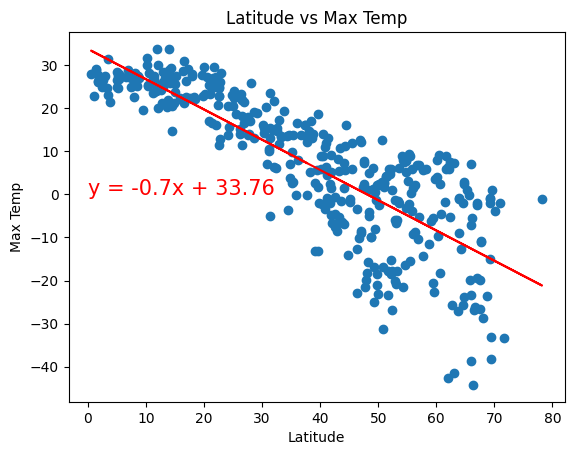

In [117]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Max Temp", (6,0))

The r^2-value is: 0.2095411443732916


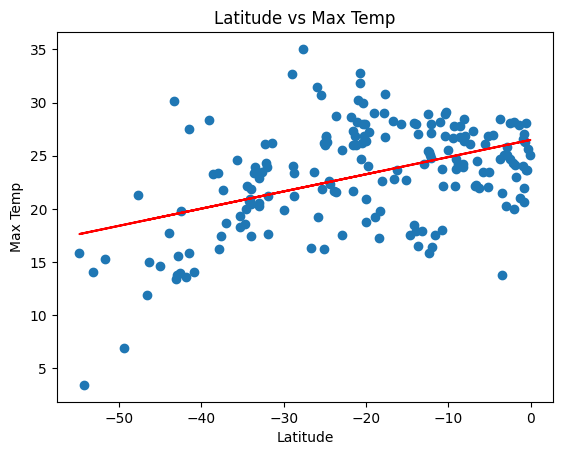

In [118]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Max Temp", (6,0))

**Discussion about the linear relationship: 

The linear regression for the Northern Hemisphere supports the idea that temperatures rise closer to the equator, with an R² value of 0.67 indicating a solid correlation. Since 0.5 is the minimum threshold for significance and 1.0 represents a perfect fit, this suggests a reliable trend.

In contrast, the Southern Hemisphere has an R² of just 0.2, but this is likely due to its geography rather than disproving the hypothesis. With vast oceans and fewer landmasses, there are fewer cities in the dataset, leading to a smaller, less evenly distributed sample. The weaker correlation likely reflects these limitations rather than a lack of a real trend.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.13101261869241512


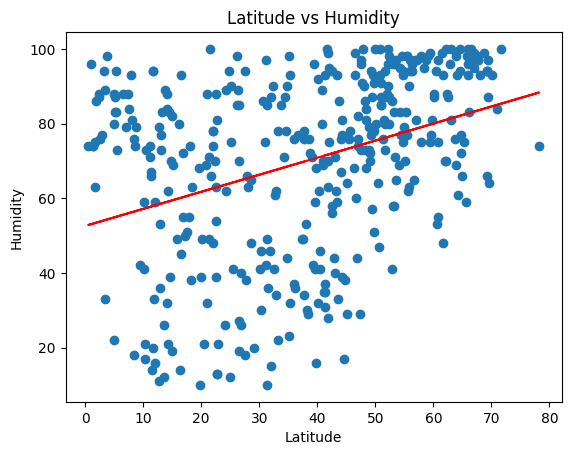

In [119]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,"Humidity", (6,0))

The r^2-value is: 0.11482842318025877


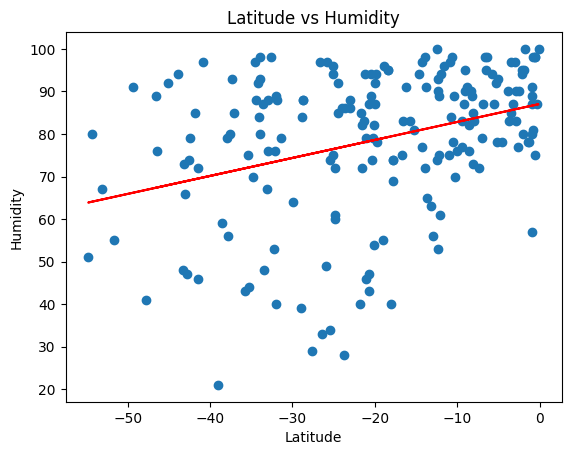

In [120]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,"Humidity", (6,0))

**Discussion about the linear relationship:** 
Both the Northern and Southern Hemispheres show a weak correlation between latitude and humidity. This is likely because humidity spikes sharply in tropical regions near the equator, while most of the area between the poles and tropics sees little change. Since the increase isn’t gradual but happens suddenly near the equator, the R² values are low: 0.13 in the Northern Hemisphere and  0.11 in the Southern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.10429299403743364


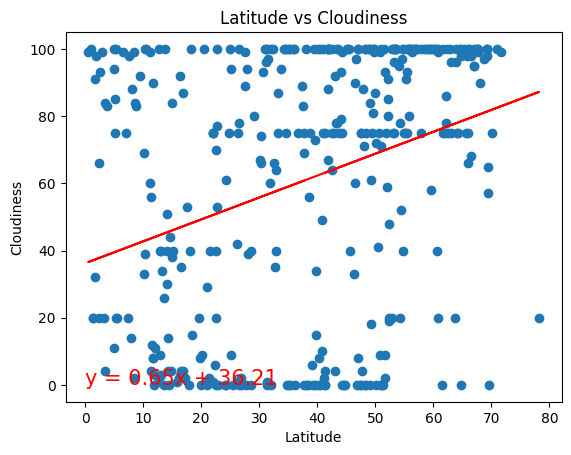

In [121]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Cloudiness", (6,0))

The r^2-value is: 0.03030695093983337


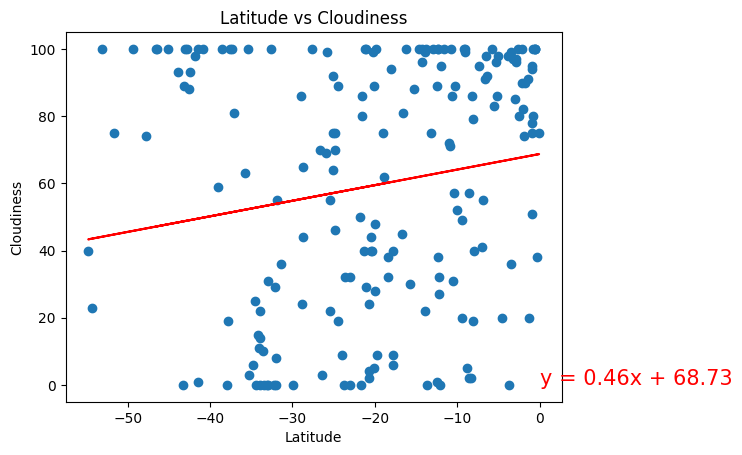

In [122]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Cloudiness", (6,0))

**Discussion about the linear relationship:**  The hypothesis that cloudiness increases as you approach the equator cna be rejected as both r2 values are very close to 0. (Northern hemisphere 0.1, Southern Hemishepre 0.03). This is likly because we are measuring just one moment in time (today). and as cloudiness is caused by weather and moves around rapidly, the measurments are to random to prove the point. Although storm patterns are well known, they too change. There might be storm in northern europe today, will its' sunny aand clear skies island. All of which can be different in an hour (or less) To proof this hypothesis, you'll need data that is collected over time, not just one point in time.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0001576427505685533


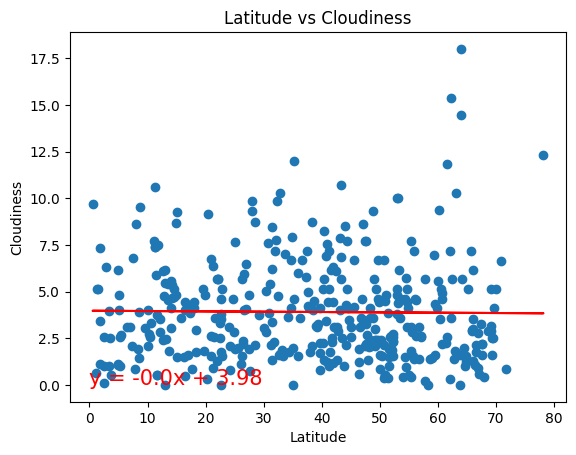

In [123]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Cloudiness", (6,0))

The r^2-value is: 0.13391065296072768


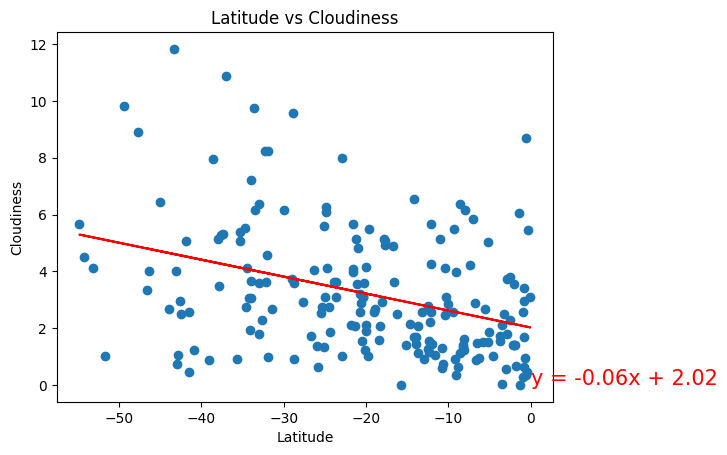

In [124]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Cloudiness", (6,0))


**Discussion about the linear relationship:** The hypothesis that cloudiness increases as you approach the equator can be rejected because the R² values are very close to 0 (0.1 in the Northern Hemisphere and 0.03 in the Southern Hemisphere). This indicates that latitude has little to no correlation with cloud cover in this dataset.

One major reason for this is that the data represents only a single moment in time (today). Cloud cover is highly variable and influenced by constantly changing weather patterns. While general storm patterns exist, they are not fixed. For example, it might be stormy in Northern Europe today but clear in Iceland, yet this could change within hours. Such rapid shifts make it impossible to identify meaningful trends from a single snapshot of data.

To properly test this hypothesis, cloud cover should be analyzed over an extended period rather than at just one point in time. A time-series analysis would provide a clearer picture of whether cloudiness consistently increases near the equator.